<a href="https://colab.research.google.com/github/mthonorio/IA/blob/develop/prova_1/IA_Prova_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º Prova de Inteligência Artificial 2021.2
#### **Aluno:** Matheus B. Honório
#### **Matrícula:** 20190097098

## Questão 1:

**(1 Ponto)** Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um. 

(a) Agente comentarista de jogo. 

(b) Agente sugestor de vinho.

(c) Agente treinador de time (como de basquete).

*Obs:* Para o preenchimento da tabela abaixo foi escolhido como esporte dos itens **a** e **c** o basquete.

| Agente | Medida de desempenho | Ambiente | Atuadores | Sensores |
| :----: | :------------------ | :------- | :-------- | :------- |
| a | Deve falar sobre a pontuação e movimento dos jogadores <br/> e das torcidas | Quadra, Times, Pontuação e Arbitragem | Microfone e Caixas de Som | Câmeras, Placar e Movimento |
| b | Deve falar qual o melhor vinho para o evento proposto,<br/> seus principais detalhes e preços | Restaurantes, Vinícolas, Vinhos e <br/> Eventos de amostra | Monitor e Caixa de Som | Câmera, Odômetro e Microfone |
| c | Maximizar as estratégias e treinamento do time por completo e <br/> individualmente, imprimir exercícios e estatísticas dos jogadores | Quadra e Conjunto de jogadores | Monitor, Impressora e Caixa de Som | Câmera, Odômetro e Microfone |
 

## Questão 2:

**(2 Pontos)** Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

A base escolhida para a questão foi a [TMDB 5000 Movies Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). <br/>
*Atualizada no dia 15/04/2022.*

### Aprendizagem supervisionada


O algoritmo de aprendizado (indutor) recebe um conjunto de exemplos de treinamento no qual os rótulos das classes são conhecidos para construir um classificador que possa determinar corretamente a classe de novos exemplos ainda não rotulados. Portanto, aplicando o método de aprendizagem supervisionada na nossa base de dados abordando como objetivo principal um modelo de **classificação** de gêneros de filmes de forma que ao submeter uma descrição e seu título é possível obter os seus gêneros.

### Aprendizagem não supervisionada

O método de aprendizagem não supervisionada busca analisar e induzir os exemplos fornecidos determinando se alguns deles podem ser agrupados de alguma maneira, formando agrupamentos ou clusters, ou seja, em nossa base de dados ao submetermos os filmes da TMDB, o algoritmo separará os filmes e agrupá-los em gêneros ou outra categoria. 

### Aprendizagem semi-supervisionada

O método de aprendizagem semi-supervisionada é o treinamento de classificadores quando uma grande de exemplos não rotulados está disponível acompanhado de um pequeno conjunto de exemplos rotulados. Portanto, em nossa base de dados poucos dados são conhecidos e uma grande parte desconhecida, podemos utilizar o aprendizado para classificar, por exemplo, classificação dos filmes utilizando semelhanças observáveis pela descrição, título ou direção.

### Aprendizagem por reforço

A aprendizagem por reforço trata de situações onde um agente aprende por tentativa e erro ao atuar sobre um ambiente dinâmico, ou seja, no nosso caso através da tentativa e erro a IA pode rotular a classificação etária do filme através de seu gênero devido ao diretor do título, descrição e gênero.

## Questão 3:

**(5 Pontos)** Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:

1. Aplique processos de pré-processamento e os necessários para execução do método K-NN.
2. Aplique correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão.
3. Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados.
4. Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.
5. Melhor K e melhor distância e testar com o conjunto de atributos do item 2.


In [239]:
#bibliotecas necessárias para ler/manipular/visualizar dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

#bibliotecas para criar o modelo de ML
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [327]:
# Lendo arquivo e visualizando 
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = movies.dropna()
credits = credits.dropna()


In [328]:
#printando os primeiros 2 índices da base de dados de filmes
movies.head()[:2]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [329]:
#printando os primeiros 2 índices da base de dados de créditos
credits.head()[:2]

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### Converte a coluna de genres, keywords, cast e crew para uma String, pois o sistema não itera se for array

In [330]:
# Trocando a coluna de JSON para String
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # A chave 'name' contêm o nome de um gênero
    movies.loc[index,'genres'] = str(list1)

movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # A chave 'name' contêm o nome de um gênero
    movies.loc[index,'keywords'] = str(list1)

In [331]:
# Trocando a coluna de JSON para STRING
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # A chave 'name' contêm o nome dos atores
    credits.loc[index,'cast'] = str(list1)


In [332]:
# mudando a coluna de JSON para STRING
credits['crew'] = credits['crew'].apply(json.loads)
for index,i in zip(credits.index,credits['crew']):
    list1 = []
    for j in range(len(i)):
      if i[j]['job'] == 'Director': # Verifica se o trabalho corresponde a diretor do filme
        list1.append((i[j]['name'])) # A chave 'name' contêm o nome dos diretores
    credits.loc[index,'crew'] = str(list1)

In [333]:
credits['crew'][1]

"['Gore Verbinski']"

Juntando as bases de dados em uma única base:

In [334]:
# mergeando(mesclando) as bases de dados
movies = movies.merge(credits, left_on='id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'crew', 'vote_average', 'keywords']]

Removendo caracteres indesejados dos dados e convertendo as colunas **genres**, **keywords**, **cast** e **crew** de *string* para *list*:

In [335]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')

movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

movies['crew'] = movies['crew'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['crew'] = movies['crew'].str.split(',')

A base de dados está com a coluna de **cast** ordenada com os atores por seu protagonismo no filme, ou seja, está ordenado do protagonista e principais atores até os menos importantes, por isso, limitamos a lista de atores do filme para focarmos nos 9 primeiros:

In [336]:
#Salvando na coluna de Cast os 9 atores mais importantes de cada índice

for index,i in enumerate(movies['cast']):
  list1 = []
  if len(i) > 10:
    for j in range(9):
      list1.append(str(i[j]))
  else:
    list1.append(str(i))
  #print(list1[1])
  movies.loc[index,'cast'] = str(list1)

In [337]:
movies['cast'] = movies['cast'].str.strip('[]').replace(' ','').replace("'",'').replace('"','')
movies['cast'] = movies['cast'].str.split(',')

In [338]:
movies['cast'] = movies['cast'].astype(str).str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

ATÉ AQUI TÁ FUNCIONANDO

In [339]:
movies2 = movies.copy()

In [340]:
movies2['crew'][5]

['SamRaimi']

In [341]:
movies2.head(2)

,id,original_title,genres,cast,crew,vote_average,keywords
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,"[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,"[ocean, drugabuse, exoticisland, eastindiatrad..."


In [344]:
print(type(movies2['cast'][1]))
print(type(movies2['cast'][1][1]))

<class 'list'>
<class 'str'>


In [315]:
movies2['cast'][7][4]

'ScarlettJohansson'

In [345]:
movies2['cast'].head()

0    [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1    [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2    [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...
3    [ChristianBale, MichaelCaine, GaryOldman, Anne...
4    [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
Name: cast, dtype: object

In [ ]:
# gerando estatísticas descritivas de nossa base de dados de filmes
movies.describe()

In [ ]:
# exibe a média dos valores disponíveis 
movies.mean()

### Tratando a coluna de "**genres**":

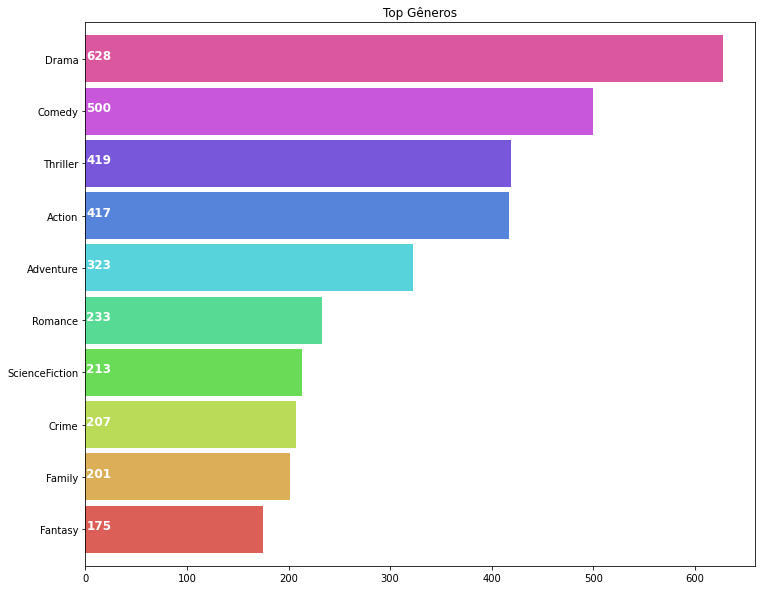

In [346]:
# Plotando o gráfico que indica a quantidade de cada filme classificado por gênero
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Gêneros')
plt.show()

In [347]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #Agora nós temos uma lista com os únicos gêneros 

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [348]:
print(genreList)

['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'Foreign', 'TVMovie', '']


In [353]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [354]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [355]:
print(movies['genres_bin'][250])

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Tratando a coluna de "**cast**" com os atores principais

In [320]:
movies['cast'][1][1]

'OrlandoBloom'

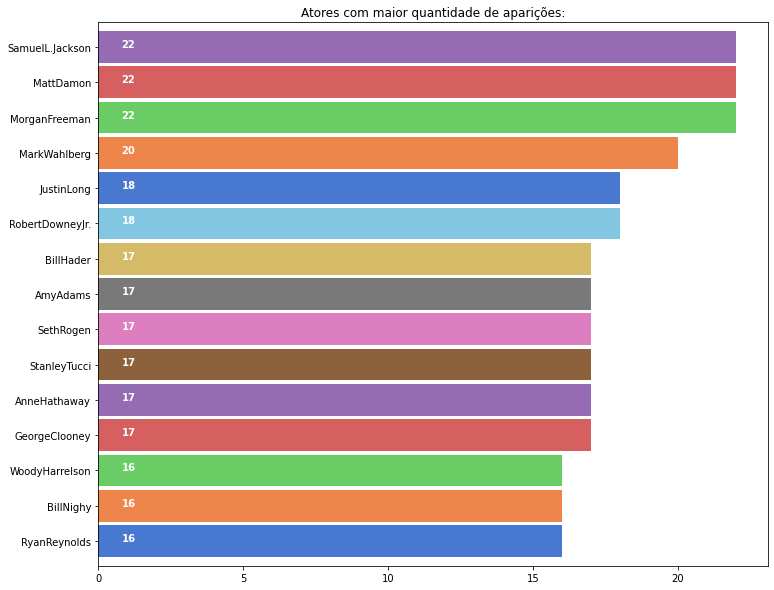

In [356]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Atores com maior quantidade de aparições:')
plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# new_dataset = movies.copy()
# lb_make_cast = LabelEncoder()
# lb_make_cast.fit(new_dataset["cast"])
# new_dataset["cast"] = lb_make_cast.transform(new_dataset["cast"])
# new_dataset.head(11)

In [357]:
actorList = []
for index, row in movies.iterrows():
    actors = row["cast"]
    
    for actor in actors:
        if actor not in actorList:
            actorList.append(actor)
actorList[:15] #Agora nós temos uma lista com o nome de todos os Atores 

['SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez',
 'GiovanniRibisi',
 'JoelDavidMoore',
 'CCHPounder',
 'WesStudi',
 'JohnnyDepp',
 'OrlandoBloom',
 'KeiraKnightley',
 'StellanSkarsgård',
 'ChowYun-fat',
 'BillNighy']

In [360]:
type(actorList[1][1])

str

In [326]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
print(movies['cast_bin'][1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [309]:
print(movies['cast_bin'][4])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Tratando a coluna de "Crew"

In [273]:
movies2 = movies.copy()

In [274]:
movies2['crew']

0       [StephenE.Rivkin, RickCarter, ChristopherBoyes...
1       [DariuszWolski, GoreVerbinski, JerryBruckheime...
2       [ThomasNewman, SamMendes, AnnaPinnock, JohnLog...
3       [HansZimmer, CharlesRoven, ChristopherNolan, C...
4       [AndrewStanton, AndrewStanton, JohnLasseter, C...
                              ...                        
1488    [KevinSmith, KevinSmith, KevinSmith, KevinSmit...
1489    [TravisLegge, TravisLegge, KyleHoskins, DrewPi...
1490    [IvanKavanagh, IvanKavanagh, IvanKavanagh, Col...
1491    [ShaneCarruth, ShaneCarruth, ShaneCarruth, Sha...
1492                             [DanielHsia, DanielHsia]
Name: crew, Length: 1493, dtype: object

### Tratando a coluna de "**Keywords**":

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
movies['keywords']

0       [cultureclash, future, spacewar, spacecolony, ...
1       [ocean, drugabuse, exoticisland, eastindiatrad...
2       [spy, basedonnovel, secretagent, sequel, mi6, ...
3       [dccomics, crimefighter, terrorist, secretiden...
4       [basedonnovel, mars, medallion, spacetravel, p...
                              ...                        
1488             [salesclerk, loser, aftercreditsstinger]
1489    [dating, divorce, sexscene, sexcomedy, antirom...
1490                                       [homeinvasion]
1491    [distrust, garage, identitycrisis, timetravel,...
1492                                                   []
Name: keywords, Length: 1493, dtype: object

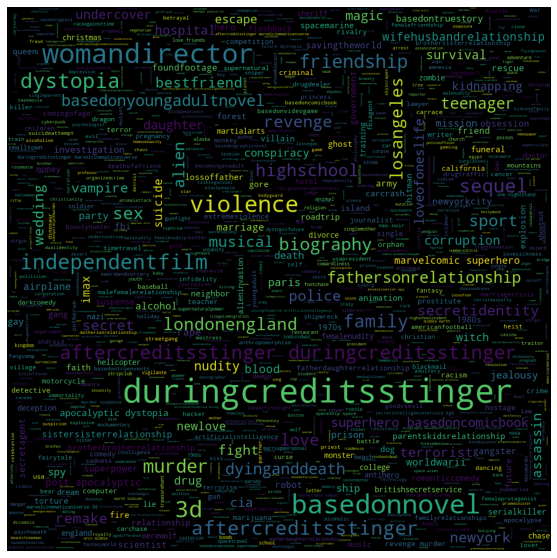

In [ ]:
stop_words = set(STOPWORDS)
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
words=[] 
words = movies['keywords'].apply(str)
words = words.dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
movies['keywords']

0       [cultureclash, future, spacewar, spacecolony, ...
1       [ocean, drugabuse, exoticisland, eastindiatrad...
2       [spy, basedonnovel, secretagent, sequel, mi6, ...
3       [dccomics, crimefighter, terrorist, secretiden...
4       [basedonnovel, mars, medallion, spacetravel, p...
                              ...                        
1488             [salesclerk, loser, aftercreditsstinger]
1489    [dating, divorce, sexscene, sexcomedy, antirom...
1490                                       [homeinvasion]
1491    [distrust, garage, identitycrisis, timetravel,...
1492                                                   []
Name: keywords, Length: 1493, dtype: object

In [ ]:
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
    movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
    movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
    movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
    movies['keywords'] = movies['keywords'].str.split(',')
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)
            movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
#movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 

In [ ]:
movies['keywords']

0       [3d, alien, alienplanet, antiwar, battle, cgi,...
1       ["loveofoneslife", aftercreditsstinger, afterl...
2       [basedonnovel, britishsecretservice, mi6, secr...
3       [batman, burglar, catburglar, catwoman, cover-...
4       [19thcentury, 3d, alien, alienrace, basedonnov...
                              ...                        
1488             [aftercreditsstinger, loser, salesclerk]
1489    [antiromanticcomedy, dating, divorce, sexcomed...
1490                                       [homeinvasion]
1491    [distrust, garage, identitycrisis, independent...
1492                                                   []
Name: keywords, Length: 1493, dtype: object

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    print(genreDistance)


    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    print(scoreDistance)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    print(wordsDistance)
    return genreDistance + scoreDistance + wordsDistance

In [ ]:
print(Similarity(3, 10))

0.25
nan
nan
nan


/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
print(movies.iloc[3])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [ChristianBale, MichaelCaine, GaryOldman, Anne...
crew              [HansZimmer, CharlesRoven, ChristopherNolan, C...
vote_average                                                    7.6
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object


In [ ]:
data=pd.DataFrame(movies)
data.head()[:2]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
X = movies[['popularity', 'revenue', 'runtime', 'vote_count']]
Y = movies[['vote_average']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), random_state = 100)

In [ ]:
clf = KNeighborsClassifier(p=2, n_neighbors=4, weights = 'distance', algorithm = 'auto')

In [ ]:
X_train = X_train.drop_duplicates()

In [ ]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [ ]:
clf.fit(X_train, encoded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
predic = clf.predict(X_test)
print(predic)

[33 36 42 20 37 27 30 38  9 15 17 39 27 27 28 37  6 40 49 31 24 23 30 29
 22 23 45 33 32 45 30  0 10 15 26 35 35 29 33 28 26 36 30 36 28 39 16 33
  8 28 29 25 31 28 34 33 26 36 27  0 29 26 10 31 45 31 24 27 36 42 28 24
 10 22 28 32 40 25 21 14 43 32 18 30  6 25 32 32 42 39 27 26 24 41 28 47
 37 36 40 24  4 21 38 29 30 23 31 33 35 39 37 30 27 50 46 18 26 27 25 34
 41 30 19 47 14 43 14 28 29 25 49 29 46 45 29 35 43 33 48 41 22 39 31 41
 24 26 45 34 35 13 49 42 17 30 26 43 28 41 28 36 15 27 35 45 45 36 33 41
 44 26 21 30 21 39 30 31 42 39 42 44 28 45 40 15 35 31 31 29 32 30 22 37
 31 36 30 32 36 32 36 30 37 28 27 34 25 28 35  2 34 34 30 39 33 29 31 46
 38 36 32  8  6 37 44 34 31 38 30 31 37 41 20 36 40 37 36 33 39 37 38 26
 50 34 32 38 35 37 26 37 17 31 27 24 40 27 52 27 34 39 37 39 20 30 42 30
 28 13 48 28 13 25 28 30 32 34 34 42 41 29 29 24 40 38 27 31 33 31 22 22
 29 32 35 25 38 21 29 40 41 39 31 25 23 29 20 33 30 28 30 30 25 43 37 37
 31  6 28 26 41 20 35 34 30 29 24 25 43 25 34 36 24

In [ ]:
from sklearn.metrics import accuracy_score
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)

print(accuracy_score(y_test, predic))

0.045454545454545456


In [ ]:
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]
X_train.head()[:2]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500


In [ ]:
X_train.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
# Finding all the columns with NULL values

np.sum(X_train.isnull())

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [ ]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['vote_average']
X_train.drop(['vote_average'],axis=1,inplace=True)
X_train.head()[:2]

,budget,id,popularity,revenue,runtime,vote_count
0,237000000,19995,150.437577,2787965087,162.0,11800
1,300000000,285,139.082615,961000000,169.0,4500


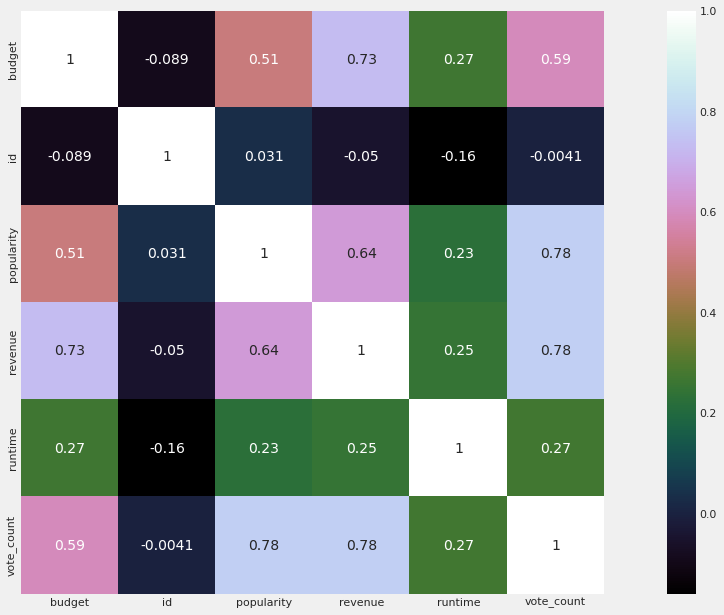

In [ ]:
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [ ]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

Text(0, 0.5, 'Cumulative explained variance')

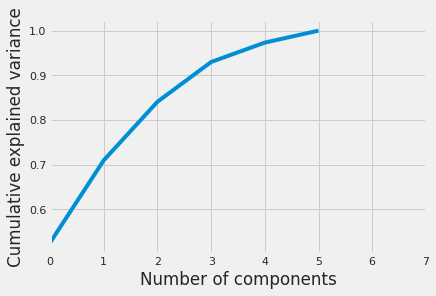

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Como 4 componentes podem explicar mais de 90% da variância, escolhemos o número de componentes como 4

(-2.0, 2.0)

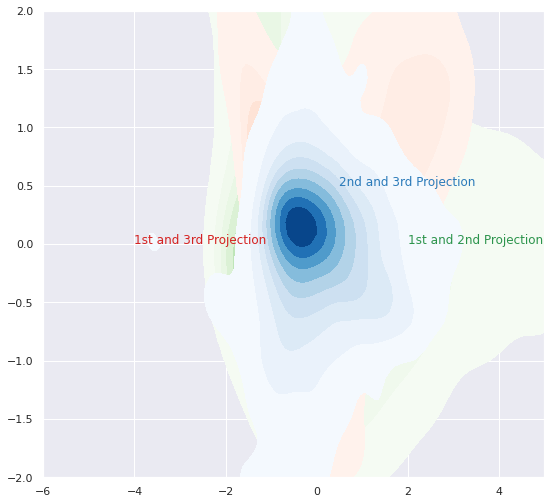

In [ ]:
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [ ]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)

In [ ]:
model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Train error = inf percent in Ridge Regression
Test error = inf percent in Ridge Regression


Começo do KNN

In [ ]:
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

n_neighbors=4
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = inf percent in Knn algorithm
Test error = 7.356017949099171 percent in knn algorithm


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Knn')

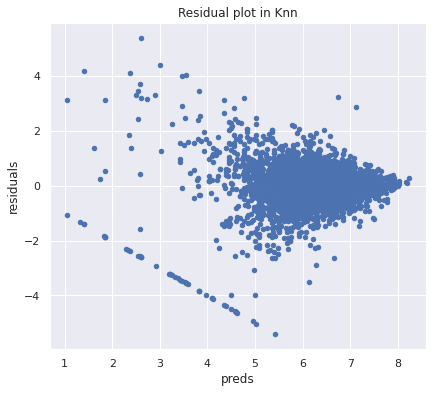

In [ ]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

In [ ]:
#Utilizando boxplot para visualizar nossos outliars
#plt.boxplot(filmes['release_year'])

#plt.title('Ano de lançamento')
#plt.xlabel('a')
#plt.ylabel('b')

## Questão 4:

**(2 Pontos)** Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

Obs: **Classe verdadeira - Coluna | Classe predita - Linha**

| **CLASSES** | Maçã | Laranja | Limão | Manga |
| ------- | :--: | :-----: | :---: | :---: |
| Maçã | 70 | 20 | 5 | 5 |
| Laranja | 10 | 67 | 3 | 20 | 
| Limão | 5 | 30 | 55 | 10 | 
| Manga | 5 | 4 | 2 | 1000 |

Maçã:

| **CLASSES** | Maçã | Laranja | Limão | Manga |
| ------- | :--: | :-----: | :---: | :---: | 
| Maçã | VP | FP | FP | FP |
| Laranja | FN | VN | VN | VN |
| Limão | FN | VN | VN | VN |
| Manga | FN | VN | VN | VN |

Laranja:

| **CLASSES** | Maçã | Laranja | Limão | Manga |
| ------- | :--: | :-----: | :---: | :---: | 
| Maçã | VN | FN | VN | VN |
| Laranja | FP | VP | FP | FP |
| Limão | VN | FN | VN | VN |
| Manga | VN | FN | VN | VN |

Limão:

| **CLASSES** | Maçã | Laranja | Limão | Manga |
| ------- | :--: | :-----: | :---: | :---: | 
| Maçã | VN | VN | FN | VN |
| Laranja | VN | VN| FN | VN |
| Limão | FP | FP | VP | FP |
| Manga | VN | VN | FN | VN |

Manga:

| **CLASSES** | Maçã | Laranja | Limão | Manga |
| ------- | :--: | :-----: | :---: | :---: | 
| Maçã | VN | VN | VN | FN |
| Laranja | VN | VN | VN | FN |
| Limão | VN | VN | VN | FN |
| Manga | FP | FP | FP | VP |

Organizando nossos valores em uma tabela, temos:

| **CLASSES** | VP | VN | FP | FN |
| ------- | :--: | :-----: | :---: | :---: | 
| Maçã | 70 | 1191 | 30 | 20 |
| Laranja | 67 | 1157 | 33 | 54 | 
| Limão | 55 | 1201 | 45 | 10 | 
| Manga | 1000 | 265 | 11 | 35 |

* Sensibilidade
* Especificidade
* Precisão
* Medida F1 
* Acurácia
* Coeficiente de Matthews
* AUC

Como você resolveria o problema dessa base de dados observando as métricas de avaliação?


In [ ]:
#Criando uma classe Fruta com os parâmetros
#Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo, Falso Negativo

class Fruta:
  def __init__(self, vp, vn, fp, fn):
    self.vp = vp
    self.vn = vn
    self.fp = fp
    self.fn = fn

#Inicializando os objetos com seus valores 
maca = Fruta(70,1191,30,20)
laranja = Fruta(67,1157,33,54)
limao = Fruta(55,1201,45,10)
manga = Fruta(1000,265,11,35)

### Métricas de Desempenho:

#### Sensibilidade:

<img src="https://latex.codecogs.com/svg.image?sens(\hat{f})&space;=&space;rev(\hat{f})&space;=&space;TVP(\hat{f})&space;=&space;\frac{VP}{VP&plus;FN}" title="https://latex.codecogs.com/svg.image?sens(\hat{f}) = rev(\hat{f}) = TVP(\hat{f}) = \frac{VP}{VP+FN}" />


In [ ]:
#Função para calcular a sensibilidade
def sens(VP, FN):
  sensibilidade = (VP/(VP+FN))
  return sensibilidade


In [ ]:
#Sensibilidade de Maçã, Laranja, Limão e Manga respectivamente.
sens_maca = sens(maca.vp, maca.fn)
sens_laranja = sens(laranja.vp, laranja.fn)
sens_limao = sens(limao.vp, limao.fn)
sens_manga = sens(manga.vp, manga.fn)

#Printando as sensibilidades:
print('A sensibilidade de maçã:{:.2f}'.format(sens_maca))
print('A sensibilidade de laranja:{:.2f}'.format(sens_laranja))
print('A sensibilidade de limão:{:.2f}'.format(sens_limao))
print('A sensibilidade de manga:{:.2f}'.format(sens_manga))

#Printando a média de Sensibilidade:
sens_media = (sens_maca + sens_laranja + sens_limao + sens_manga ) / 4
print('\nA média de sensibilidade da Matriz de Confusão é:{:.2f}\n'.format(sens_media))

A sensibilidade de maçã:0.78
A sensibilidade de laranja:0.55
A sensibilidade de limão:0.85
A sensibilidade de manga:0.97

A média de sensibilidade da Matriz de Confusão é:0.79



#### Especificidade: 

<img src="https://latex.codecogs.com/svg.image?esp(\hat{f})&space;=&space;\frac{VN}{VN&plus;FP}&space;=&space;1-TFP(\hat{f})" title="https://latex.codecogs.com/svg.image?esp(\hat{f}) = \frac{VN}{VN+FP} = 1-TFP(\hat{f})" />

In [ ]:
#Função para calcular a especificidade
def esp(VN, FP):
  especificidade = VN/(VN+FP)
  return especificidade

In [ ]:
#Especificidade de Maçã, Laranja, Limão e Manga respectivamente.
espec_maca = esp(maca.vn, maca.fp)
espec_laranja = esp(laranja.vn, laranja.fp)
espec_limao = esp(limao.vn, limao.fp)
espec_manga = esp(manga.vn, manga.fp)

#Printando as especificidades
print('A especificidade de maçã:{:.2f}'.format(espec_maca))
print('A especificidade de laranja:{:.2f}'.format(espec_laranja))
print('A especificidade de limão:{:.2f}'.format(espec_limao))
print('A especificidade de manga:{:.2f}'.format(espec_manga))

#Printando a média de especificidade:
esp_media = (espec_maca + espec_laranja + espec_limao + espec_manga ) / 4
print('\nA média de especificidade da Matriz de Confusão é:{:.2f}\n'.format(esp_media))

A especificidade de maçã:0.98
A especificidade de laranja:0.97
A especificidade de limão:0.96
A especificidade de manga:0.96

A média de especificidade da Matriz de Confusão é:0.97



#### Precisão:

<img src="https://latex.codecogs.com/svg.image?prec(\hat{f})&space;=&space;\frac{VP}{VP&plus;FP}" title="https://latex.codecogs.com/svg.image?prec(\hat{f}) = \frac{VP}{VP+FP}" />


In [ ]:
#Função para calcular a precisão
def prec(VP, FP):
  precisao = VP/(VP+FP)
  return precisao

In [ ]:
#Precisão de Maçã, Laranja, Limão e Manga respectivamente.
prec_maca = prec(maca.vp, maca.fp)
prec_laranja = prec(laranja.vp, laranja.fp)
prec_limao = prec(limao.vp, limao.fp)
prec_manga = prec(manga.vp, manga.fp)

#Printando as precisões:
print('A precisão de maçã:{:.2f}'.format(prec_maca))
print('A precisão de laranja:{:.2f}'.format(prec_laranja))
print('A precisão de limão:{:.2f}'.format(prec_limao))
print('A precisão de manga:{:.2f}'.format(prec_manga))

#Printando a média de precisão:
prec_media = (prec_maca + prec_laranja + prec_limao + prec_manga ) / 4
print('\nA média de precisão da Matriz de Confusão é:{:.2f}\n'.format(prec_media))

#### Medida-F1:

<img src="https://latex.codecogs.com/svg.image?F&space;=&space;2&space;\cdot&space;\frac{prec&space;\cdot&space;sens}{prec&space;&plus;&space;sens}" title="https://latex.codecogs.com/svg.image?F = 2 \cdot \frac{prec \cdot sens}{prec + sens}" />

In [ ]:
#Função para calcular a medida-F:
def medf(PREC, SENS):
  medidaF = 2*((PREC*SENS)/(PREC+SENS))
  return medidaF

In [ ]:
#Medida-F de Maçã, Laranja, Limão e Manga respectivamente.
med_maca = medf(prec_maca, sens_maca)
med_laranja = medf(prec_laranja, sens_laranja)
med_limao = medf(prec_limao, sens_limao)
med_manga = medf(prec_manga, sens_manga)

#Printando as precisões:
print('A Medida-F1 de maçã:{:.2f}'.format(med_maca))
print('A Medida-F1 de laranja:{:.2f}'.format(med_laranja))
print('A Medida-F1 de limão:{:.2f}'.format(med_limao))
print('A Medida-F1 de manga:{:.2f}'.format(med_manga))

#Printando a média de Medida-F1:
med_media = (med_maca + med_laranja + med_limao + med_manga ) / 4
print('\nA média de Medida-F1 da Matriz de Confusão é:{:.2f}\n'.format(med_media))

#### Acurácia Total:

<img src="https://latex.codecogs.com/svg.image?ac(\hat{f})&space;=&space;\frac{VP&plus;VN}{n}" title="https://latex.codecogs.com/svg.image?ac(\hat{f}) = \frac{VP+VN}{n}" />

In [ ]:
#Função para calcular a medida-F:
def ac(VP, VN, FP, FN):
  acuracia = (VP+VN)/(VP+VN+FP+FN)
  return acuracia

In [ ]:
#Acurácia total de Maçã, Laranja, Limão e Manga respectivamente.
act_maca = ac(maca.vp, maca.vn, maca.fp, maca.fn)
act_laranja = ac(laranja.vp, laranja.vn, laranja.fp, laranja.fn)
act_limao = ac(limao.vp, limao.vn, limao.fp, limao.fn)
act_manga = ac(manga.vp, manga.vn, manga.fp, manga.fn)

#Printando as acurácias:
print('A acurácia total de maçã:{:.2f}'.format(act_maca))
print('A acurácia total de laranja:{:.2f}'.format(act_laranja))
print('A acurácia total de limão:{:.2f}'.format(act_limao))
print('A acurácia total de manga:{:.2f}'.format(act_manga))

#Printando a média de Acurácia total:
act_media = (act_maca + act_laranja + act_limao + act_manga ) / 4
print('\nA média de Acurácia Total da Matriz de Confusão é:{:.2f}\n'.format(act_media))

#### Coeficiente Matthews:

<img src="https://latex.codecogs.com/svg.image?phi&space;=&space;\frac{(VP\cdot&space;VN&space;-&space;FP\cdot&space;FN)}{\sqrt{(VP&plus;FP)\cdot&space;(VP&plus;FN)\cdot&space;(VN&plus;FP)\cdot&space;(VN&plus;FN)}}&space;" title="https://latex.codecogs.com/svg.image?phi = \frac{(VP\cdot VN - FP\cdot FN)}{\sqrt{(VP+FP)\cdot (VP+FN)\cdot (VN+FP)\cdot (VN+FN)}} " />


In [ ]:
#Função para calcular o Coeficiente Matthews:
import math
def matthews(VP, VN, FP, FN):
  phi = ((VP*VN)-(FP*FN)) / math.sqrt(((VP+FP)*(VP+FN)*(VN+FP)*(VN+FN)))
  return phi

In [ ]:
#Coeficiente Matthews de Maçã, Laranja, Limão e Manga respectivamente.
matthews_maca = matthews(maca.vp, maca.vn, maca.fp, maca.fn)
matthews_laranja = matthews(laranja.vp, laranja.vn, laranja.fp, laranja.fn)
matthews_limao = matthews(limao.vp, limao.vn, limao.fp, limao.fn)
matthews_manga = matthews(manga.vp, manga.vn, manga.fp, manga.fn)

#Printando a média de Coeficiente Matthews:
phi = (matthews_maca + matthews_laranja + matthews_limao + matthews_manga ) / 4
print('\nO Coeficiente Matthews da Matriz de Confusão é:{:.2f}\n'.format(phi))


O Coeficiente Matthews da Matriz de Confusão é:0.71



#### AUC:

In [ ]:
import numpy as np

def auc(SENS, ESPEC):
  tvp = SENS
  tfp = (1-ESPEC)

  x = np.array([0, tvp, 1])
  y = np.array([0, tfp, 1])

  auc = np.trapz(x, y)
  return auc

In [ ]:
#Printando a média de Coeficiente Matthews:
AUC = auc(sens_media, esp_media)
print('\nO AUC da Matriz de Confusão é:{:.2f}\n'.format(AUC))


O AUC da Matriz de Confusão é:0.88



#### Conclusão:

* Sensibilidade = 0.79
* Especificidade = 0.97
* Precisão = 0.73
* Medida F1 = 0.75
* Acurácia = 0.95
* Coeficiente de Matthews = 0.71
* AUC = 0.88

Para melhorar as métricas de avaliação, é necessário melhorar a fase de pré-processamento do banco de dados, portanto, executar uma limpeza na base de dados e re-treinar o modelo de classificação.

## Questão Extra: 

Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.